#Streaming Spotify TOP 100

##Latar Belakang Dataset

Spotify adalah salah satu platform untuk streaming musik dan podcast. Di notebook ini, saya akan melakukan analisis lagu-lagu streaming Spotify top 100 untuk menemukan pola yang menarik di antara lagu-lagu top tersebut.

## Pertanyaan Analisis



1. Feature musik vs tahun release
2. Genre lagu yang paling banyak pada spotify top 100
3. Artis yang memiliki lagu lebih dari satu pada spotify top 100
4. Tahun release paling banyak dari lagu top 100
5. Lagu top 5 berdasarkan popularity lagu tersebut



##EDA (Exploratory Data Analysis)

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Top 100 most Streamed.csv')
data.head()

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   artist            100 non-null    object
 2   top genre         100 non-null    object
 3   year              100 non-null    int64 
 4   beats.per.minute  100 non-null    int64 
 5   energy            100 non-null    int64 
 6   danceability      100 non-null    int64 
 7   loudness.dB       100 non-null    int64 
 8   liveness          100 non-null    int64 
 9   valance           100 non-null    int64 
 10  length            100 non-null    int64 
 11  acousticness      100 non-null    int64 
 12  speechiness       100 non-null    int64 
 13  popularity        100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


In [ ]:
data.describe()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,2015.960000,116.970000,62.680000,66.96000,-6.100000,16.860000,49.970000,214.530000,24.95000,9.930000,79.670000
std,5.327497,27.470629,16.491737,13.60401,1.987334,12.972403,21.737857,35.934974,26.27876,9.424077,5.905065
min,1975.000000,71.000000,11.000000,35.00000,-14.000000,3.000000,6.000000,119.000000,0.00000,2.000000,53.000000
25%,2015.000000,95.000000,52.000000,59.00000,-7.000000,10.000000,33.750000,190.500000,4.00000,4.000000,79.000000
50%,2017.000000,115.000000,64.500000,69.00000,-6.000000,12.000000,48.000000,210.000000,13.00000,6.000000,81.000000
75%,2018.000000,135.250000,76.000000,77.00000,-5.000000,17.250000,66.000000,234.250000,41.50000,11.000000,83.000000
max,2021.000000,186.000000,92.000000,91.00000,-3.000000,79.000000,93.000000,354.000000,98.00000,46.000000,91.000000


## Data Preparation

Tahun Release

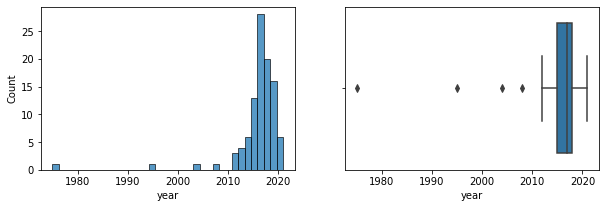

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.histplot(ax=ax[0],x='year',data=data)
sns.boxplot(ax=ax[1],x='year',data=data)

In [ ]:
data[data['year']<2010]

,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
44,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975,71,40,41,-10,30,22,354,27,5,81
53,Mr. Brightside,The Killers,alternative rock,2004,148,91,35,-5,10,24,223,0,7,81
68,I'm Yours,Jason Mraz,acoustic pop,2008,151,46,69,-8,11,72,242,60,5,80
82,Wonderwall - Remastered,Oasis,beatlesque,1995,174,90,38,-4,19,47,259,0,4,77


In [ ]:
# Menghapus 4 lagu yang release sebelum 2010
# untuk meningkatkan keterbacaan plot berikutnya
data_clean = data.loc[data['year']>2010]
data_clean['year']

0     2020
1     2019
2     2021
3     2019
4     2017
      ... 
95    2016
96    2015
97    2021
98    2018
99    2016
Name: year, Length: 96, dtype: int64

Genre

In [ ]:
data.columns

Index(['title', 'artist', 'top genre', 'year', 'beats.per.minute', 'energy',
       'danceability', 'loudness.dB', 'liveness', 'valance', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [ ]:
data_genre = data.groupby("top genre").sum()
#Klasifikasi berdasarkan variabel genre
data_genre.head()

,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
top genre,,,,,,,,,,,
acoustic pop,2008,151,46,69,-8,11,72,242,60,5,80
alternative rock,2004,148,91,35,-5,10,24,223,0,7,81
australian dance,2016,90,70,63,-6,9,73,212,5,11,75
australian pop,2019,98,59,82,-6,15,51,209,69,9,80
beatlesque,1995,174,90,38,-4,19,47,259,0,4,77


##Data Visualization

###1. Feature musik vs tahun release!

In [ ]:
def plot_feat(data,string):
    fig, ax = plt.subplots(3,3, figsize=(12,6),sharey=True, sharex=True)
    sns.barplot(ax=ax[0,0], y=string, x= 'energy', data=data, orient = 'h')
    sns.barplot(ax=ax[0,1], y=string, x= 'danceability', data=data, orient = 'h')
    sns.barplot(ax=ax[0,2], y=string, x= 'liveness', data=data, orient = 'h')
    sns.barplot(ax=ax[1,0], y=string, x= 'valance', data=data, orient = 'h')
    sns.barplot(ax=ax[1,1], y=string, x= 'acousticness', data=data, orient = 'h')
    sns.barplot(ax=ax[1,2], y=string, x= 'speechiness', data=data, orient = 'h')
    sns.barplot(ax=ax[2,0], y=string, x= 'popularity', data=data, orient = 'h')
    ax[2,1].axis('off')
    ax[2,2].axis('off')
    plt.tight_layout()

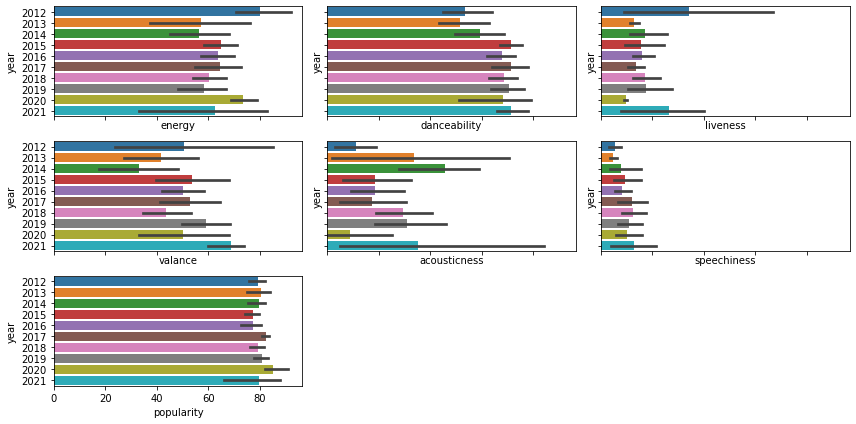

In [ ]:
plot_feat(data_clean,'year')

In [ ]:
data_music = data_clean.drop(['year','artist','top genre','title','loudness.dB','length','beats.per.minute'], axis=1)

Text(0.5, 1.0, 'Musical features mean values')

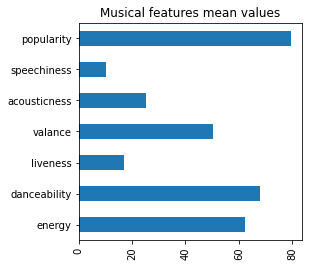

In [ ]:
plt.figure(figsize=(4,4))
data_music.mean().plot(kind='barh')
plt.xticks(rotation=90)
plt.title('Musical features mean values')

In [ ]:
data_music.mean()

energy          62.510417
danceability    67.843750
liveness        16.833333
valance         50.333333
acousticness    25.083333
speechiness     10.125000
popularity      79.666667
dtype: float64

Dari barplot diatas dapat dilihat bahwa danceability dan speechiness dalam lagu top 100 mengalami peningkatan selama bertahun-tahun. Valance juga memiliki tren peningkatan (meskipun sedikit) dari tahun ke tahun. Selain itu, liveness serta acousticness  memiliki range yang sangat lebar pada tahun 2021 dan mean terlihat cukup tinggi dibandingkan tahun-tahun lainnya.

Dari plot diatas dapat disimpulkan bahwa spotify top 100 ini rata-rata lagunya memiliki popularity, danceability dan energy yang tinggi. Sedangkan, liveness dan speechiness-nya termasuk rendah.

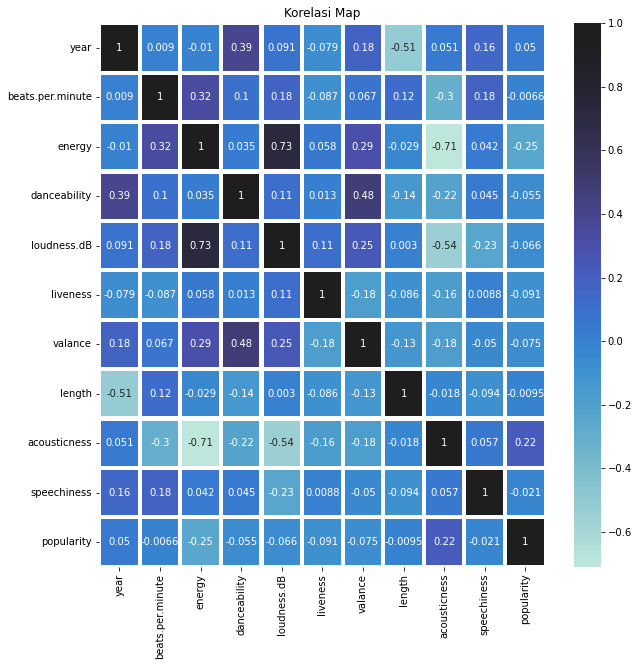

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Korelasi Map')
ax=sns.heatmap(data.corr(),linewidth=3.1,annot=True,center=1)

Map diatas adalah nilai yang menunjukkan korelasi antar variabel features. Dapat dilihat bahwa kebanyakan nilai diatas mendekati nol yang artinya tidak memiliki korelasi. Tetapi ada juga korelasi mempunyai korelasi seperti energy dan loudness.dB yang bernilai 0.73.

###2. Genre lagu yang paling banyak pada spotify top 100

In [ ]:
data['top genre'].value_counts()

dance pop                    28
pop                          11
dfw rap                       7
modern rock                   6
canadian pop                  6
canadian contemporary r&b     4
electropop                    4
melodic rap                   3
rap                           2
emo rap                       2
canadian hip hop              2
folk-pop                      2
latin                         2
detroit hip hop               1
north carolina hip hop        1
pop dance                     1
danish pop                    1
alternative rock              1
acoustic pop                  1
classic rock                  1
brostep                       1
beatlesque                    1
chicago rap                   1
boy band                      1
cali rap                      1
pop rap                       1
neo soul                      1
australian pop                1
electro house                 1
conscious hip hop             1
lgbtq+ hip hop                1
gangster

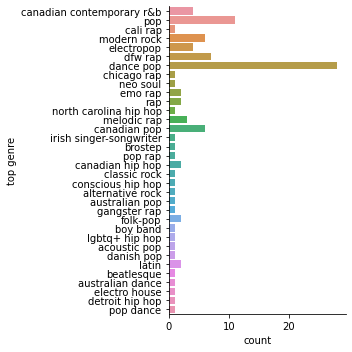

In [ ]:
#Menggunakan catplot
#Menghitung genre di spotify top 100. 
sns.catplot(y = "top genre", kind = "count", data = data)
plt.show()

Dapat dilihat bahwa di top 100 ini paling banyak lagu bergenre dance pop yaitu sebanyak 28 dari 100 lagu.

###3. Artis yang memiliki lagu lebih dari satu pada spotify top 100

In [ ]:
data_art = data['artist'].value_counts()

In [ ]:
data_top = data_art[data_art>1]
data_top

Post Malone          7
Ed Sheeran           5
The Weeknd           4
Imagine Dragons      4
Billie Eilish        3
The Chainsmokers     3
Shawn Mendes         3
Justin Bieber        3
Maroon 5             3
Sam Smith            2
Luis Fonsi           2
Charlie Puth         2
Twenty One Pilots    2
Travis Scott         2
Dua Lipa             2
Drake                2
XXXTENTACION         2
Major Lazer          2
Ariana Grande        2
Name: artist, dtype: int64

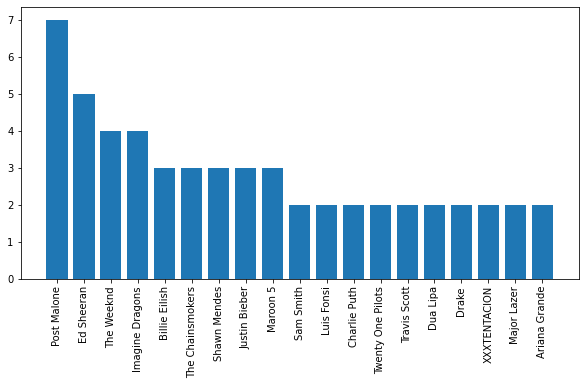

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(data_top.index, data_top)
plt.xticks(rotation=90);

Dari plot diatas dapat disimpulkan bahwa Post Malone memiliki lagu terbanyak yaitu 7 lagu, Ed Sheeran memiliki 5 lagu, The Weeknd dan Imagine Dragons memiliki 4 lagu. Selebihnya mempunya 3 atau 2 lagu pada top 100.

###4. Tahun release paling banyak dari lagu top 100

In [ ]:
data_year = data['year'].value_counts()
data_year

2018    20
2019    16
2016    16
2015    13
2017    12
2014     6
2013     4
2021     3
2020     3
2012     3
2008     1
2004     1
1995     1
1975     1
Name: year, dtype: int64

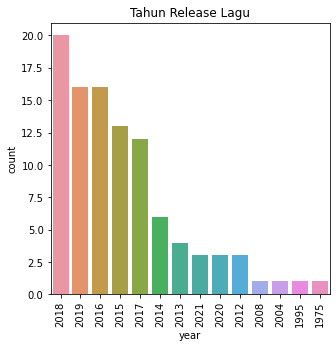

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(data = data , x = data['year'] , order=data['year'].value_counts().index[:14])
plt.title('Tahun Release Lagu')
plt.xticks(rotation=90);

Dari plot diatas dapat diketahui bahwa kebanyakan lagu direlease pada tahun 2018.

###5. Lagu top 5 berdasarkan popularity lagu tersebut

,title,artist,popularity
0,Blinding Lights,The Weeknd,91
2,Mood (feat. iann dior),24kGoldn,88
1,Watermelon Sugar,Harry Styles,88
3,Someone You Loved,Lewis Capaldi,86
4,Perfect,Ed Sheeran,86


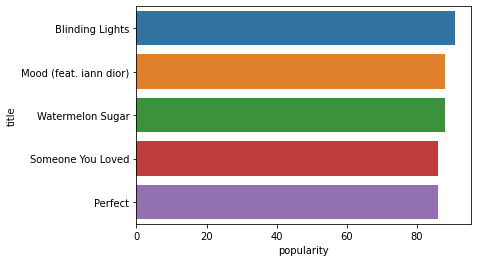

In [ ]:
data_lagu = data.sort_values('popularity',ascending = False)[['title','artist','popularity']]
data_lagu = data_lagu[:5]

sns.barplot(y = 'title',x = 'popularity', data=data_lagu)
data_lagu

Lagu paling populer adalah Blinding Lights - The Weeknd. Kemudian top 2 sampai 5 berturut-turut yaitu Mood (feat. iann dior) - 24kGoldn, Watermelon Sugar	- Harry Styles, Someone You Loved	- Lewis Capaldi, Perfect - Ed Sheeran.